In [1]:
#run first
import numpy as np
import pandas as pd
import scipy.stats as scipy_stats
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# np.random.RandomState(42)

In [ ]:
from sklearn.metrics

# ✨`Find the mean, median and mode`

In [59]:
np.random.seed(0)
X = np.random.randint(0,100,size=(100))
print('X_mean =',np.mean(X))
print('X_median =',np.median(X))
print('X_mode =',np.argmax(np.bincount(X)))

X_mean= 48.23
X_median= 47.0
X_mode= 88


# ✨`Fine the range and midrange`

In [60]:
print('X_range = ',max(X) - min(X))
print('X_midrange = ',(max(X)-min(X))/2)

X_range =  99
X_midrange =  49.5


# ✨`Pictogram Chart`

# ✨`Bar Plot`

In [66]:
%matplotlib inline
import seaborn as sns ; sns.set()
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
tips.pivot_table(index='day',columns='sex',values='total_bill')

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


d:\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


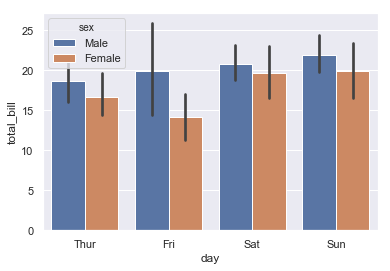

In [64]:
sns.barplot(x="day",y="total_bill",hue="sex",data=tips)

[`Using Error Bars in your Graph`](https://projects.ncsu.edu/labwrite/res/gt/gt-stat-home.html#opennewwindow)

In [108]:
Fri_Male = tips.loc[(tips.day == 'Fri')&(tips.sex == 'Male'),'total_bill']
print(np.mean(Fri_Male)  +2*np.std(Fri_Male) / (len(Fri_Male))**0.5)
print(np.mean(Fri_Male)  -2*np.std(Fri_Male) / (len(Fri_Male))**0.5)

25.86650849903717
13.847491500962828


# ✨`Line Plot`

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
temp = pd.DataFrame({'-195':[1,1,2,1,2],'0':[52,58,82,35,84],'20':[48,66,74,86,78],'100':[73.5,82,72,80,79]})
temp

,-195,0,20,100
0,1,52,48,73.5
1,1,58,66,82.0
2,2,82,74,72.0
3,1,35,86,80.0
4,2,84,78,79.0


In [4]:
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html
temp = temp.T.stack().reset_index()[["level_0", 0]]
temp.columns = ['temp','energy']
temp['temp'] = pd.to_numeric(temp['temp'])

In [5]:
temp.head()

,temp,energy
0,-195,1.0
1,-195,1.0
2,-195,2.0
3,-195,1.0
4,-195,2.0


d:\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


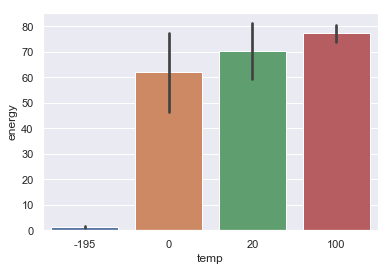

In [9]:
sns.barplot(x="temp",y="energy",data=temp)

# ✨`Pie Plot`

# ✨`Misunderstanding Line Plot`

# ✨`Stem-and-Leaf Plot`
https://en.wikipedia.org/wiki/Stem-and-leaf_display

# ✨`Boxplots`

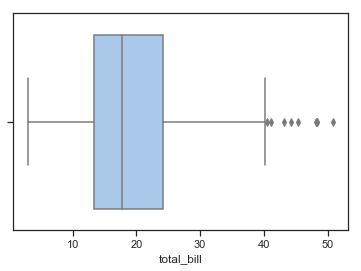

In [4]:
import seaborn as sns
sns.set(style="ticks",palette="pastel")
sns.boxplot(x=tips["total_bill"])

# ✨`Boxplots 2`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

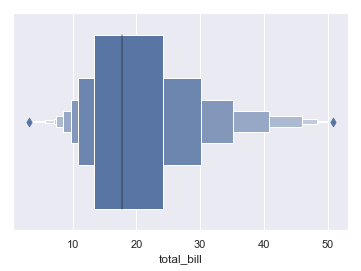

In [3]:
tips = sns.load_dataset("tips")
sns.boxenplot(x=tips["total_bill"])

# ✨`Central Tendency`

Statistics
- Descriptive Statistics
- Inferential Statistics

`Central Tendency`
- mean
    - arithmetic mean
    - geometric mean (stock return)
    - harmonic mean
- median
- mode

# ✨`Population & Sample`

$μ = Population mean$
 
$\bar{X}  = Sample mean$

In [1]:
import numpy as np
import pandas as pd
np.random.seed(seed=42)
popu = pd.DataFrame(np.random.normal(0,1,size=100))
print("population mean = ",popu.mean())
samp = popu.sample(50)
print("sample mean = ",samp.mean())

population mean =  0   -0.103847
dtype: float64
sample mean =  0   -0.122167
dtype: float64


# ✨`Population Variance`

In [97]:
#dispersion tendency
popu.var(ddof = 0)

0    0.816522
dtype: float64

In [98]:
popu_var = 0
N = len(popu)

for i in range(N):
    popu_var += (popu.iloc[i,0] - popu.mean())**2
print(popu_var/N)

0    0.816522
dtype: float64


# ✨`Sample Variance`

In [99]:
#unbias sample variance
samp.var()

0    1.085657
dtype: float64

In [100]:
samp_var = 0
n = len(samp)

for i in range(n):
    samp_var += (samp.iloc[i,0] - samp.mean())**2
print(samp_var/(n-1))

0    1.085657
dtype: float64


🤔Why we divide by n-1? Is bias var always underestimate for sample?

In [116]:
var_samp = []
for i in range(1000):
    var_samp.append(popu.sample(50).var(ddof = 0))

{'whiskers': [<matplotlib.lines.Line2D at 0xdb67690>,
 'caps': [<matplotlib.lines.Line2D at 0xdbb1b90>,
 'boxes': [<matplotlib.lines.Line2D at 0xdb5d990>],
 'medians': [<matplotlib.lines.Line2D at 0xdbd9870>],
 'fliers': [<matplotlib.lines.Line2D at 0xdbf95d0>],
 'means': []}

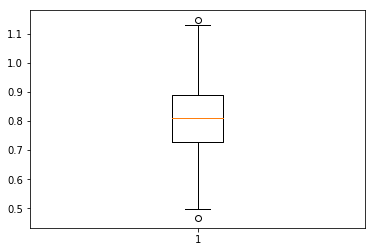

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.hist(np.array(var_samp))
plt.boxplot(np.array(var_samp))

# ✨`Standard Deviation`

In [5]:
print("population std = ",popu.std(ddof=0))
print("sample std = ",samp.std())

population std =  0    0.903616
dtype: float64
sample std =  0    1.041949
dtype: float64


# ✨`Standard Deviations Simplification`

In [20]:
N = len(popu)
popu_std = 0

for i in range(N):
    popu_std += (popu.iloc[i,0] - popu.mean())**2
print((popu_std/N)**0.5)

0    0.903616
dtype: float64


# ✨`Random Variable`

# ✨`Probability Density Function`

#PMF probability mass function
> 除了直方图，另一种可以表示分布的方法是概率质量函数（probability mass function，PMF）。概率质量函数将每个值映射到其概率。概率（probability）是频数的分数表示，样本量为n。要从频数计算出概率，我们将频数除以n，这一过程称为正态化（normalization）。

In [5]:
import os
os.chdir('D:\\datasets\\ThinkStats2-master\\code')
%run nsfg.py

'C:\\Users\\randa\\Desktop\\JupyterNote\\Python\\PyPrac'

In [13]:
import thinkstats2
pmf = thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

![](http://upload.ouliu.net/i/20181227110743v43lh.png)

#CDF Cumulative Distribution Function
> PMF适用于变量值数量较少的情况。但是随着值的数量增加，每个值对应的概率会变得越来越小，随机噪音的影响就会变大。
为了解决上面的问题，我们可以将数据分区，即将值的的范围划分为互不重叠的区间，然后计算每个区间中值的数目。分区是很实用的方法，但选择区间大小并不容易。如果区间太大，在消除噪音的同时，也可能会消除有用的信息。

⏬与图4-1相比较，图4-4更清晰地展示了分布的形状以及分布之间的差异。从图中我们可以看出，第一胎新生儿普遍体重较轻，而且大于均值时差异更为明显。

![](http://epub.ituring.com.cn/api/storage/getbykey/screenshow?key=1509bffafa3e7d726fc1)

![](http://epub.ituring.com.cn/api/storage/getbykey/screenshow?key=1509276bc0f1492b6538)

# ✨`Binomial Distribution 1`
# ✨`Binomial Distribution 2`
# ✨`Binomial Distribution 3`
# ✨`Binomial Distribution 4`

![](http://ww4.sinaimg.cn/mw690/6941baebgw1ereiqab04dj208r023weh.jpg)

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.rcParams['figure.figsize'] = (14,7)
plt.figure(dpi=100)

C:\Users\randa\AppData\Roaming\Python\Python36\site-packages\matplotlib\__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


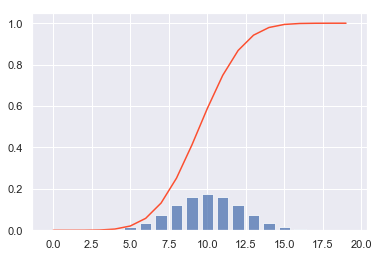

In [4]:
plt.bar(
        left=(np.arange(20)),
        height=(stats.binom.pmf(np.arange(20),p=0.5,n=20)),
        width=0.75,alpha=0.75)

plt.plot(
         np.arange(20),
         stats.binom.cdf(np.arange(20),p=0.5,n=20),
         color="#fc4f30")

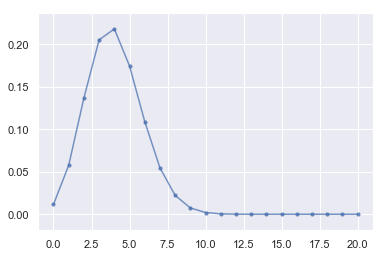

In [5]:
#P=0.2
plt.scatter(np.arange(21),stats.binom.pmf(np.arange(21),p=0.2,n=20),alpha=0.75,s=10)
plt.plot(np.arange(21),stats.binom.pmf(np.arange(21),p=0.2,n=20),alpha=0.75)

# ✨`Expectation`

> The expected value of a random variable is exact same thing as population mean.
When you have an infinite population, so you cann't just add up the number and divide by the number. But if you know the frequency of the numbers, you can still calculate the mean.
So how do you figure out the frequency of number show up, you can look at the probability distribution.

# ✨`Expectation of Binomial Distribution`
> E(x) = np

# ✨`Poisson Distribution 1`
# ✨`Poisson Distribution 2`

[1] https://blog.csdn.net/lanchunhui/article/details/50346893

[2] http://www.empiricalzeal.com/2012/12/24/are-mass-shootings-really-random-events-a-look-at-the-us-numbers/

[3] https://www.gunviolencearchive.org/

[4] http://episte.math.ntu.edu.tw/articles/sm/sm_16_07_1/index.html

![](http://ww2.sinaimg.cn/mw690/6941baebgw1ereirz6m85j204401qglg.jpg)

In [3]:
import scipy.stats as scipy_stat
X = scipy_stat.poisson(2)
[(X.pmf(i),X.cdf(i)) for i in range(7)]

[(0.1353352832366127, 0.1353352832366127),
 (0.2706705664732254, 0.40600584970983794),
 (0.2706705664732254, 0.6766764161830634),
 (0.18044704431548356, 0.857123460498547),
 (0.09022352215774178, 0.9473469826562889),
 (0.03608940886309672, 0.9834363915193856),
 (0.012029802954365565, 0.9954661944737512)]

In [4]:
num_years = [4,10,7,5,4,0,0,1]
shooting_lambda = sum(x*y for x,y in zip(range(8),num_years))/sum(num_years)

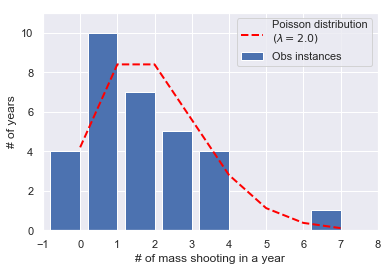

In [13]:
import numpy as np
import scipy.stats as scipy_stat
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


X = scipy_stat.poisson(2)
num_years = num_years = [4,10,7,5,4,0,0,1]
x = range(8)

plt.bar(np.array(x)-.4,num_years,label="Obs instances")
plt.plot(x,sum(num_years)*X.pmf(x),ls='dashed',
        lw=2,c='red',label='Poisson distribution\n$(\lambda=2.0)$')
plt.xlim([-1,8])
plt.ylim([0,11])
plt.xlabel('# of mass shooting in a year')
plt.ylabel('# of years')
plt.legend(loc='best')
plt.show()

In [14]:
[31*X.pmf(i) for i in range(8)]

[4.195393780334994,
 8.390787560669988,
 8.390787560669988,
 5.59385837377999,
 2.796929186889995,
 1.1187716747559984,
 0.3729238915853325,
 0.10654968331009501]

# ✨`Law of Large Numbers`
> [大数定律](https://wiki.mbalib.com/wiki/%E5%A4%A7%E6%95%B0%E5%AE%9A%E5%BE%8B)

# ✨`Binomial and Normal Distribution`

![](http://ww4.sinaimg.cn/mw690/6941baebgw1ereio0h4wyj20e001wjrh.jpg)

# ✨`Introduction of Normal Distribution`

In [4]:
import scipy.stats as scipy_stat
import numpy as np
mu = 1
sigma = 1
X = np.arange(-5,5,0.1)
Y = scipy_stat.norm.pdf(X,0,1) #Probability density function at x of the given RV.

Text(0,0.5,'Probability density function ')

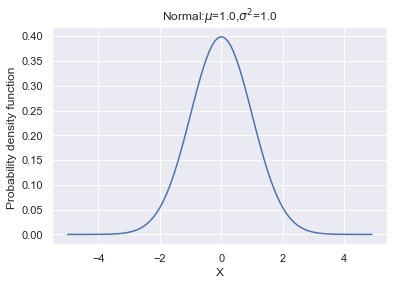

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.plot(X,Y)
plt.title('Normal:$\mu$=%.1f,$\sigma^2$=%.1f'%(mu,sigma))
plt.xlabel('X')
plt.ylabel('Probability density function ')


# ✨`Examples of Normal Distribution`

# ✨`Z score`

In [2]:
#ref: https://blog.csdn.net/sinat_26917383/article/details/51228217
np.random.seed(42)
X = np.random.randint(0,100,(100,))

C:\Users\randa\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.3903444 , 0.30026492, 0.15013246, 0.21018545, 0.30026492,
        0.3903444 , 0.27023843, 0.36031791, 0.3903444 , 0.24021194]),
 array([-1.68354731, -1.35050807, -1.01746884, -0.68442961, -0.35139037,
        -0.01835114,  0.31468809,  0.64772732,  0.98076656,  1.31380579,
         1.64684502]),
 <a list of 1 Patch objects>)

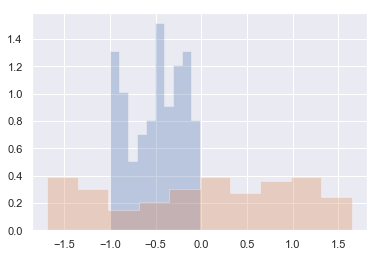

In [19]:
kwargs = dict(histtype='stepfilled',alpha=0.3,normed=True)

plt.hist(((X - X.min()) / X.max() - X.min()),**kwargs)
plt.hist(((X - X.mean())/X.std(ddof=1)),**kwargs)

# ✨`68-95-99.7 Rules`
# ✨`Prac 68-95-99.7 Rules`
# ✨`PracⅡ68-95-99.7 Rules`

In [28]:
#NORMDIST(x, mu, sigma, cumulative) from excel
#rvs stands for Random Variates
scipy_stats.norm.cdf(-1,loc=0,scale=1.0) - scipy_stats.norm.cdf(1,loc=0,scale=1.0) 
# scipy_stats.norm.cdf((-1,1),loc=0,scale=1.0) 

-0.6826894921370859

# ✨`Central Limit Theorem`

> In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. 

In [17]:
X = pd.DataFrame(np.random.randint(0,100,size=10000),columns=['random_var'])
sample_mean = []
for i in range(1000):
    sample_mean.append(X.sample(100).random_var.mean())

d:\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


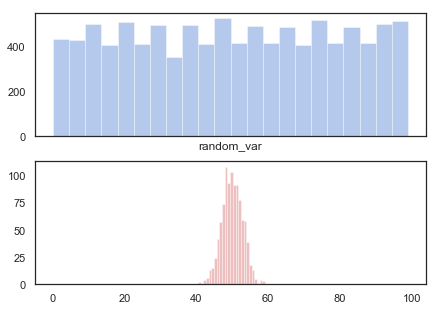

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
sns.distplot(X.random_var, kde=False, color="b", ax=ax1)
sns.distplot(sample_mean, kde=False, color="r", ax=ax2)
# plt.hist(X.random_var,ax=ax1)
# plt.hist(sample_mean,ax=ax2)

# ✨`Sampling Dist. of Sample Mean`
# ✨`Sampling Dist. of Sample Mean 2`

# ✨`SEM Standard Error of the Mean`

$$SEM = \frac{\sigma}{\sqrt{n}}$$

d:\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


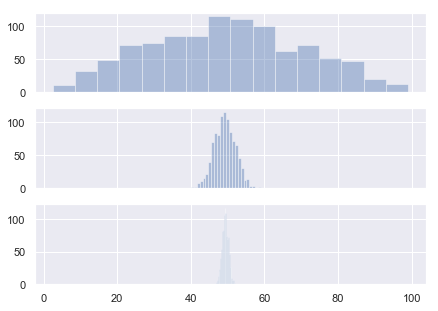

In [33]:
# *********************************#
# rd = np.random.RandomState(42)
# rd.randint(0,100,size=100)
# *********************************#

np.random.seed(42)
X = pd.DataFrame(np.random.randint(0,100,size=10000),columns=['rd_var'])
sample_mean_2 = []
for i in range(1000):
    sample_mean_2.append(X.sample(2).rd_var.mean())

sample_mean_100 = []
for i in range(1000):
    sample_mean_100.append(X.sample(100).rd_var.mean())

sample_mean_1000 = []
for i in range(1000):
    sample_mean_1000.append(X.sample(1000).rd_var.mean())
    
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)
sns.distplot(sample_mean_2,kde=False,color='b',ax=ax1)
sns.distplot(sample_mean_100,kde=False,color='b',ax=ax2)
sns.distplot(sample_mean_1000,kde=False,color='b',ax=ax3)

# ✨`Sample Distribution Example`

In [54]:
sam_std = 0.7/50**0.5

1- scipy_stats.norm.cdf(2.2,loc=2.0,scale=sam_std) 

0.021675875630431274

# ✨`Confidence Interval `

\begin{example}
You sample 36 apples from your farm's harvest of over 200,000 apples. The mean weight of the sample is 112 grams(w/ a 40 gram sample standard deviation) What is the proba that the mean weight of all 200,000 apples is within 100 and 124 grams
\end{example}





In [9]:
n,mean_samp,std_samp = [36,112,40]
std_pop = std_samp/(n**0.5)
scipy_stats.norm.cdf(124,loc=112,scale=std_pop) - scipy_stats.norm.cdf(100,loc=112,scale=std_pop)

0.9281393617741485

# ✨`Bernoulli Distribution Example`
# ✨`Bernoulli Distribution Mean & Variance`

In [4]:
from scipy.stats import bernoulli
p = 0.3
mean,var,skew,kurt = bernoulli.stats(p,moments='mvsk')

In [7]:
print(mean,'\n',var,'\n',skew,'\n',kurt)

0.3 
 0.21 
 0.8728715609439698 
 -1.2380952380952375


# ✨`Bernoulli Distribution Interval`

In [27]:
p = 0.57
mean,var = bernoulli.stats(p,moments='mv')

In [15]:
n = 100
samp_var = var*100/99
mean_std_est = samp_var**0.5/(100**0.5)

Text(0,0.5,'Probability density function ')

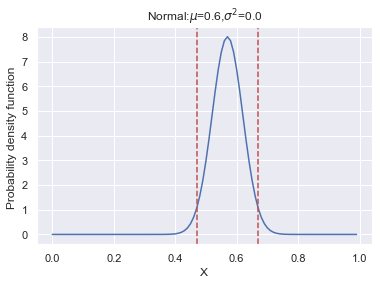

In [40]:
X = np.arange(0,1,0.01)
Y = scipy_stat.norm.pdf(X,p,mean_std_est)

plt.plot(X,Y)
plt.axvline(p-2*mean_std_est,color="r", linestyle="--")
plt.axvline(p+2*mean_std_est,color="r", linestyle="--")
plt.title('Normal:$\mu$=%.1f,$\sigma^2$=%.1f'%(p,mean_std_est))
plt.xlabel('X')
plt.ylabel('Probability density function ')

# ✨`Bernoulli Distribution Interval 2`
# ✨`Confidence Interval 2`

- https://www.ncbi.nlm.nih.gov/pubmed/8899234

- http://www.jebm.cn/CN/10.12019/j.issn.1671-5144.2017.05.015

- http://blog.topspeedsnail.com/archives/749

In [8]:
#mock 1
np.random.seed(0)
X = np.random.normal(loc=50.0, scale=10.0, size=500)
Y = np.random.normal(loc=52.5,scale=10.0,size=500)

In [11]:
scipy_stats.mstats.ttest_ind(a=X,b=Y)

Ttest_indResult(statistic=-16.431986993625472, pvalue=4.6777516353522e-49)

In [22]:
#mock 2
X = np.random.normal(loc=50.0, scale=10.0, size=500)
Y = np.random.normal(loc=51.5,scale=10.0,size=500)

X_samp = np.random.choice(X, 100)
Y_samp = np.random.choice(Y,100)

In [23]:
scipy_stats.mstats.ttest_ind(a=X_samp,b=Y_samp)

Ttest_indResult(statistic=-1.8470135499559843, pvalue=0.0662373914028757)

In [92]:
cls = np.concatenate([np.repeat('X_cls',500),np.repeat('Y_cls',500)]).reshape(1000,1)
value = np.concatenate([X.reshape(500,1),Y.reshape(500,1)])
df = pd.DataFrame(np.concatenate([cls,value],axis=1),columns=['cls','cls_value'])
df.cls_value = df.cls_value.astype('float64')

In [117]:
# sns.set(style='ticks')
# sns.catplot(x='cls',y='cls_value',kind='point',data=df,ci = 'sd')
# sns.catplot(x='cls',y='cls_value',kind='point',data=df,ci = 68)
# sns.catplot(x='cls',y='cls_value',kind='point',data=df,ci = 95)

![](http://upload.ouliu.net/i/20190118115455t5jua.png)

# ✨Confidence Interval of Small Sample

In [2]:
from scipy.stats import t
t.interval(0.95,10,loc=1,scale=2)
#degree of freedom 10

(-3.456277703929877, 5.456277703929877)

In [4]:
def StudentTCI(loc,scale,df,alpha=0.95):
    return t.interval(alpha,df,loc,scale)

print (StudentTCI(1,2,10,0.99))

(-5.338545334351676, 7.338545334351676)


# ✨Hypothesis Testing
# ✨One-tailed / Two-tailed

In [9]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=norm%20cdf
import scipy.stats as scipy_stats

samp_n = 100
pop_mean = 1.2
samp_mean = 1.05
samp_std = 0.5

#H0 durg has no effect
#h1 drug lowers the response time
std_est = samp_std/samp_n**0.5
z_score = (pop_mean-samp_mean)/std_est

scipy_stats.norm.cdf(1.05,loc=1.2,scale=std_est) > 0.05
#the proba above show that if the drug doesn't lower the response time,
#what's the proba that we get a lowering this extrem or more  extrem

False

In [20]:
2* scipy_stats.norm.cdf(1.05,loc=1.2,scale=std_est) > 0.05

False

# ✨Z Statistics / T Statistics

In [4]:
# Calculate the z score of each value in the sample, 
# relative to the sample mean and standard deviation.
a = np.array([0.7972,  0.0767,  0.4383,  0.7866,  0.8091,
             0.1954,  0.6307,  0.6599,  0.1065,  0.0508])
from scipy import stats
stats.zscore(a)
stats.zscore(a,ddof=1)

array([ 1.06939901, -1.1830039 , -0.05258212,  1.03626165,  1.10660039,
       -0.81192795,  0.5488923 ,  0.64017636, -1.08984414, -1.26397161])

# ✨TypeⅠ error

![](http://www.ituring.com.cn/figures/2016/R2/16.d10z.001.png)

# ✨Hypothesis Testing for Small Sample

In [13]:
arr = np.array([15.6,16.2,22.5,20.5,16.4,19.4,16.6,17.9,12.7,13.9])

In [59]:
#ddof=1 population mean
t_stat = (20-arr.mean())/(arr.std(ddof=1)/(len(arr))**0.5)

In [32]:
1 - scipy_stats.t.cdf(t_stat,df=len(arr)-1,loc=0,scale=1) > 0.01

False

In [72]:
scipy_stats.t.cdf(t_stat,df=len(arr)-1,loc=0,scale=1)

0.9925417928755512

In [75]:
scipy_stats.t.cdf(arr.mean(),df=9,loc=20.0,scale=arr.std(ddof=1)/(10)**0.5)

0.0074582071244487635

In [70]:
import scipy.stats as scipy_stats
scipy_stats.ttest_1samp(a=arr,popmean=20).pvalue/2

0.0074582071244487635

# ✨CI for Small Sample

In [76]:
from scipy.stats import t
t.interval(0.99,len(arr)-1,loc=20,scale=arr.std(ddof=1)/(10)**0.5)
#degree of freedom 10

(16.9360065156678, 23.0639934843322)

 # ✨Hypothesis Testing for Big Sample
 > We want to test the hypothesis that more than 30% if US housholds have interner access (w/ significance level of 5%). We collect a sample of 150 households and find that 57 have access

for binormial dist, if np>5,you can assume that the dist if the sample proportion is going to be normal
https://wenku.baidu.com/view/6bf30395284ac850ad02426d.html

In [3]:
#h0 p<=0.3
#h1 p>0.3
#Bernoulli distribution
pop_mean = 0.3
pop_std = (0.3*0.7)**0.5
#
samp_mean_std = pop_std/(150)**0.5
# z_score = (pop_mean-57/150)/samp_mean_std
import scipy.stats as scipy_stats
1-scipy_stats.norm.cdf(57/150,loc=pop_mean,scale=samp_mean_std) > 0.05

False

# ✨Sum & Differences of Random Variable

`For Two Random Variables X & Y`

$Z=X + Y$

$E(Z)=E(X+Y)=E(X)+E(Y)$

$Var(Z)=Var(X)+Var(Y)$

---

$Z=X - Y$

$E(Z)=E(X+Y)=E(X)-E(Y)$

$Var(Z)=Var(X)+Var(Y)$

# ✨Distribution of Differences of Sample Mean

$Z=mean_X - mean_Y$

$mean_Z = mean_X - mean_Y$

$Var(Z)=Var(mean_X)+Var(mean_Y)$

# ✨CI of Differences of Sample Mean (A)
# ✨CI of Differences of Sample Mean (B)

> We're trying to test whether a new, low-fat diet actually helps obese people lose 
weight.100 randomly assigned obese people are assigned to group 1 and put on the 
low fat diet. Another 100 randomly assigned obese people are assigned to group 2 
and put on a diet of approximately the same amount of food, but not as low in fat.
After 4 months, the mean weight loss was 9.31 lbs.for group 1 (s=4.67) and 7.40 lbs.
(s=4.04) for group 2.

In [1]:
n = 100
m = 100

mean_x = 9.31
std_x = 4.67

mean_y = 7.40
std_y = 4.04

In [2]:
import scipy.stats as scipy_stats

In [13]:
mean_z = mean_x - mean_y
std_z = (std_x**2/n + std_y**2/m)**0.5
scipy_stats.norm.interval(0.95,loc=mean_z,scale=std_z)

(0.6997242233173577, 3.1202757766826426)

> It looks like the low-fat group lost more weight just based on our samples than the control group. So just based on what we see, maybe you lose an incremental 1.91 pounds every four months if you are on this diet.

> Just to be clear, there is not a pure 95% chance that the true difference of the true means liew in this. We are just confident that there is a 95% chance. We always to put a little confidence there. Because we didn't actually know the population std. We estimated them with our sample. Because of that, we don't know that it's an exact probability.

# ✨Hypothesis Testing for Diff of Mean

In [4]:
mean_z = mean_x - mean_y
std_z = (std_x**2/n + std_y**2/m)**0.5
z_score = mean_z/std_z

In [17]:
mean_z > scipy_stats.norm.interval(0.95,loc=0,scale=1)[1]*std_z

True

# ✨Comparison of Sample Proportion 1
# ✨Comparison of Sample Proportion 2

`Sampling Distribution of a Sample Proportion`

In [2]:
m = 1000
p1 = 642/1000
std_1 = p1*(1-p1)
n = 1000
p2 = 591/1000
std_2 = p2*(1-p2)

In [16]:
prop_z = p1-p2
std_z = (std_1/m + std_2/n)**0.5
z_score = prop_z/std_z

In [17]:
scipy_stats.norm.interval(0.95,loc=prop_z,scale=std_z)

(0.008438760424625616, 0.09356123957537447)

# ✨Hypothesis Testing for Sample Proportion Difference

In [25]:
1- scipy_stats.norm.cdf(x=prop_z,loc=0,scale=std_z) > 0.05

False

# ✨Square Error
# ✨Derivation
# ✨Derivation
# ✨Derivation 
# ✨Derivation

In [23]:
np.random.seed(30)
X = np.random.randint(0,100,size=(100))
y = X*3 + np.random.randn(100)

In [31]:
from sklearn.linear_model import LinearRegression
mdl_lr = LinearRegression()
mdl_lr.fit(X.reshape(100,1),y)
print(mdl_lr.coef_,'\n',mdl_lr.intercept_)

[2.99530773] 
 0.2393129270823806


In [38]:
linear_coef = ((X.mean())*(y.mean())-(X*y).mean())/((X.mean())**2-(X**2).mean())
linear_coef

2.995307731938556

In [40]:
linear_inter = y.mean() - linear_coef*X.mean()
linear_inter

0.23931292708255114

---

🎈`Exponential Distribution`

![](http://ww4.sinaimg.cn/mw690/6941baebgw1ereinwucxwj20ai01dgli.jpg)

Text(0,0.5,'Probability Density')

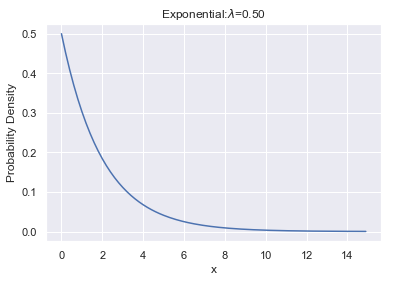

In [13]:
lambd = 0.5
x = np.arange(0,15,0.1)
y = lambd*np.exp(-lambd*x)
#y = scipy_stat.expon.pdf(x)

plt.plot(x,y)
plt.title('Exponential:$\lambda$=%0.2f' % lambd)
plt.xlabel('x')
plt.ylabel('Probability Density')